In [1]:
import numpy as np
from qutip import *
from pylab import *
%matplotlib inline

# Setup the Standard Problem

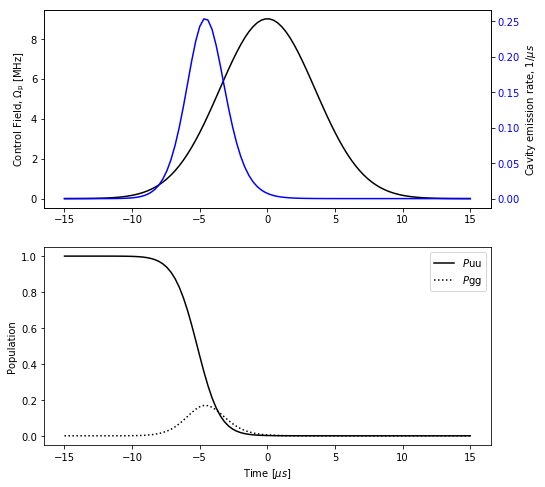

In [2]:
# Define atomic states. Use ordering from paper
ustate = basis(3, 0)
excited = basis(3, 1)
ground = basis(3, 2)

# Set where to truncate Fock state for cavity
N = 5

# Create the atomic operators needed for the Hamiltonian
sigma_ge = tensor(qeye(N), ground * excited.dag())  # |g><e|
sigma_ue = tensor(qeye(N), ustate * excited.dag())  # |u><e|

# Create the photon operator
a = tensor(destroy(N), qeye(3))
ada = tensor(num(N), qeye(3))

# Define collapse operators
c_op_list = []
# Cavity decay rate
kappa = 1.5
c_op_list.append(np.sqrt(kappa) * a)

# Atomic decay rate
gamma = 6
# Use Rb branching ratio of 5/9 e->u, 4/9 e->g
c_op_list.append(np.sqrt(5 * gamma / 9) * sigma_ue)
c_op_list.append(np.sqrt(4 * gamma / 9) * sigma_ge)

# Define time vector
t = np.linspace(-15, 15, 100)
# Define pump strength as a function of time
wp = lambda t: 9 * exp(-(t / 5) ** 2)

# Set up the time varying Hamiltonian
g = 5
H0 = -g * (sigma_ge.dag() * a + a.dag() * sigma_ge)
H1 = (sigma_ue.dag() + sigma_ue)

H = [H0,[-H1, '9*exp(-(t / 5)** 2)']]


# Define initial state
psi0 = tensor(basis(N, 0), ustate)

# Define states onto which to project (same as in paper)
state_GG = tensor(basis(N, 1), ground)
sigma_GG = state_GG * state_GG.dag()
state_UU = tensor(basis(N, 0), ustate)
sigma_UU = state_UU * state_UU.dag()

output = mesolve(H, psi0, t, c_op_list,
                 [ada, sigma_UU, sigma_GG])

exp_ada, exp_uu, exp_gg = (output.expect[0], output.expect[1],
                           output.expect[2])

# Plot the results
figure(figsize=(8,8))
subplot(211)
plot(t, wp(t), 'k')
ylabel('Control Field, $\Omega_\mathrm{p}$ [MHz]')
ax = twinx()
plot(t, kappa * exp_ada, 'b')
ylabel('Cavity emission rate, $1/\mu s$')
for tl in ax.get_yticklabels():
    tl.set_color('b')

subplot(212)
plot(t, exp_uu, 'k-', label='$P{\mathrm{uu}}$')
plot(t, exp_gg, 'k:', label='$P{\mathrm{gg}}$')
ylabel('Population')
xlabel('Time [$\mu s$]')
legend()
show()

# Generate Some Random Noise for Gaussian

In [3]:
func = lambda t: 9*exp(-(t / 5)** 2)

In [4]:
rnd_func = lambda t: func(t)+(0.05*func(t))*np.random.randn(t.shape[0])

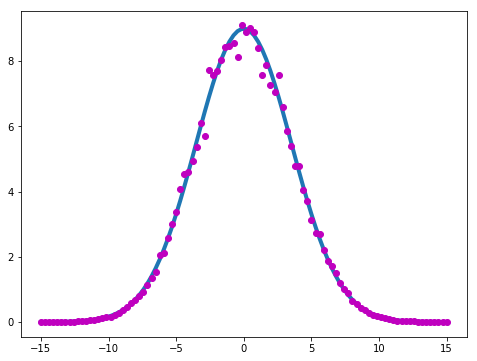

In [5]:
figure(figsize=(8,6))
plot(t,func(t),lw=4)
plot(t, rnd_func(t),'mo')
show()

# Use QuTiP's Cubic_Spline to Interpolate

In [6]:
S = Cubic_Spline(t[0], t[-1], rnd_func(np.linspace(t[0],t[-1],1000)))

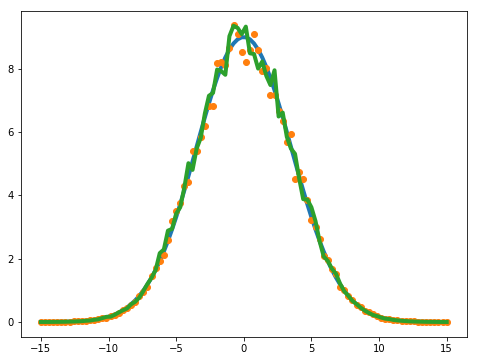

In [7]:
figure(figsize=(8,6))
plot(t,func(t),lw=4)
plot(t, rnd_func(t),'o')
plot(t, S(t),'-',lw=4)
show()

# Solve for Evolution with Noisy Gaussian via Interpolation

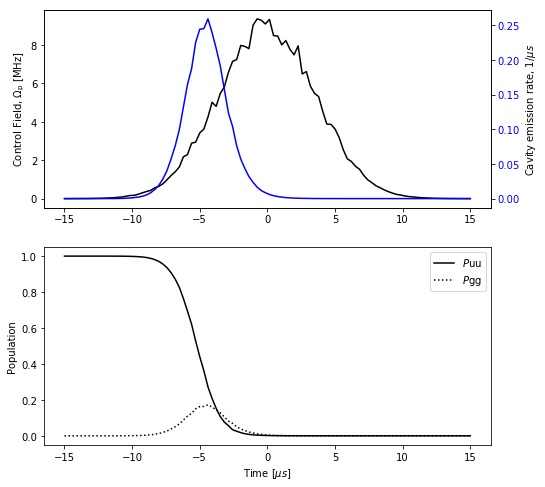

In [8]:
# Define atomic states. Use ordering from paper
ustate = basis(3, 0)
excited = basis(3, 1)
ground = basis(3, 2)

# Set where to truncate Fock state for cavity
N = 2

# Create the atomic operators needed for the Hamiltonian
sigma_ge = tensor(qeye(N), ground * excited.dag())  # |g><e|
sigma_ue = tensor(qeye(N), ustate * excited.dag())  # |u><e|

# Create the photon operator
a = tensor(destroy(N), qeye(3))
ada = tensor(num(N), qeye(3))

# Define collapse operators
c_op_list = []
# Cavity decay rate
kappa = 1.5
c_op_list.append(np.sqrt(kappa) * a)

# Atomic decay rate
gamma = 6
# Use Rb branching ratio of 5/9 e->u, 4/9 e->g
c_op_list.append(np.sqrt(5 * gamma / 9) * sigma_ue)
c_op_list.append(np.sqrt(4 * gamma / 9) * sigma_ge)

# Define time vector
t = np.linspace(-15, 15, 100)
# Define pump strength as a function of time
wp = lambda t: 9 * exp(-(t / 5) ** 2)

# Set up the time varying Hamiltonian
g = 5
H0 = -g * (sigma_ge.dag() * a + a.dag() * sigma_ge)
H1 = (sigma_ue.dag() + sigma_ue)

# Hamiltonian with interpolation 'S' as time-dependence
H = [H0,[-H1, S]]

# Define initial state
psi0 = tensor(basis(N, 0), ustate)

# Define states onto which to project (same as in paper)
state_GG = tensor(basis(N, 1), ground)
sigma_GG = state_GG * state_GG.dag()
state_UU = tensor(basis(N, 0), ustate)
sigma_UU = state_UU * state_UU.dag()

output = mesolve(H, psi0, t, c_op_list,
                 [ada, sigma_UU, sigma_GG])

exp_ada, exp_uu, exp_gg = (output.expect[0], output.expect[1],
                           output.expect[2])

# Plot the results
figure(figsize=(8,8))
subplot(211)
plot(t, S(t), 'k')
ylabel('Control Field, $\Omega_\mathrm{p}$ [MHz]')
ax = twinx()
plot(t, kappa * exp_ada, 'b')
ylabel('Cavity emission rate, $1/\mu s$')
for tl in ax.get_yticklabels():
    tl.set_color('b')

subplot(212)
plot(t, exp_uu, 'k-', label='$P{\mathrm{uu}}$')
plot(t, exp_gg, 'k:', label='$P{\mathrm{gg}}$')
ylabel('Population')
xlabel('Time [$\mu s$]')
legend()
show()

In [9]:
from qutip.ipynbtools import version_table
version_table()

Software,Version
QuTiP,4.3.0.dev0+6e5b1d43
Numpy,1.13.1
SciPy,0.19.1
matplotlib,2.0.2
Cython,0.25.2
Number of CPUs,2
BLAS Info,INTEL MKL
IPython,6.1.0
Python,"3.6.2 |Anaconda custom (x86_64)| (default, Jul 20 2017, 13:14:59) [GCC 4.2.1 Compatible Apple LLVM 6.0 (clang-600.0.57)]"
OS,posix [darwin]
